In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = load_iris()
X = data.data
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df['flower_name'] = df.target.apply(lambda x: data.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


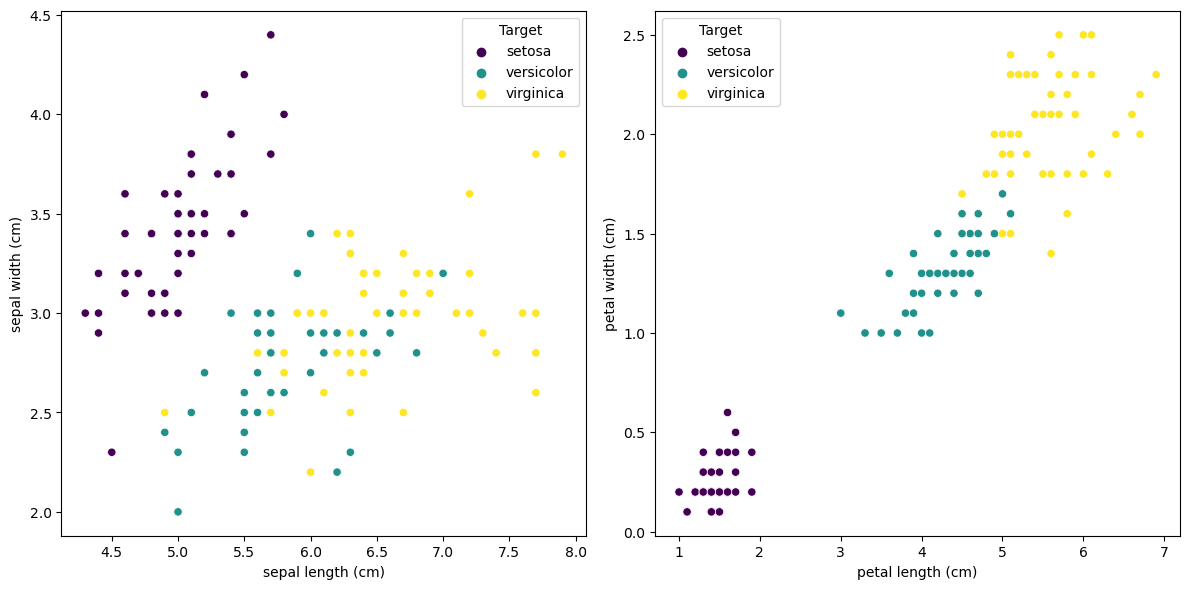

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First graph
scatter1 = sns.scatterplot(ax=axes[0], x=X[:, 0], y=X[:, 1], hue=data.target, palette='viridis')
handles1, _ = scatter1.get_legend_handles_labels()
axes[0].legend(handles1, data.target_names, title='Target')
axes[0].set_xlabel(data.feature_names[0])
axes[0].set_ylabel(data.feature_names[1])

# Second graph
scatter2 = sns.scatterplot(ax=axes[1], x=X[:, 2], y=X[:, 3], hue=data.target, palette='viridis')
handles2, _ = scatter2.get_legend_handles_labels()
axes[1].legend(handles2, data.target_names, title='Target')
axes[1].set_xlabel(data.feature_names[2])
axes[1].set_ylabel(data.feature_names[3])

plt.tight_layout()
plt.show()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target', 'flower_name'], axis=1), df['target'], test_size=0.2)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
125,7.2,3.2,6.0,1.8
13,4.3,3.0,1.1,0.1
145,6.7,3.0,5.2,2.3
69,5.6,2.5,3.9,1.1
26,5.0,3.4,1.6,0.4
...,...,...,...,...
22,4.6,3.6,1.0,0.2
63,6.1,2.9,4.7,1.4
41,4.5,2.3,1.3,0.3
87,6.3,2.3,4.4,1.3


In [6]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

Text(95.72222222222221, 0.5, 'Truth')

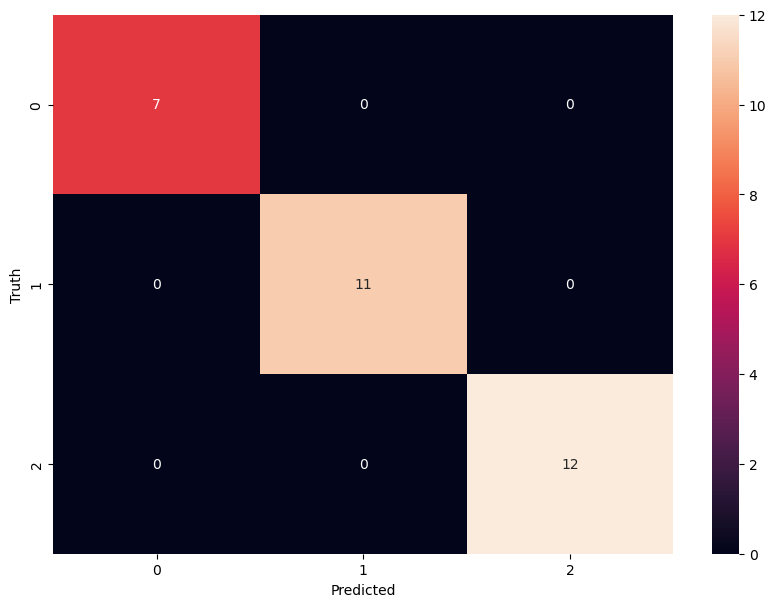

In [7]:
y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Exercise
## Train a SVM classifier using the digits dataset
### 1) Measure score using diferent kernels (rbf, linear)
### 2) Tune the model using regularization (C) and gamma parameters

In [8]:
from sklearn.datasets import load_digits

In [9]:
data = load_digits()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), df.target, test_size=0.3)

In [12]:
model = SVC(kernel='rbf', C=10, gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5037037037037037

Text(95.72222222222221, 0.5, 'Truth')

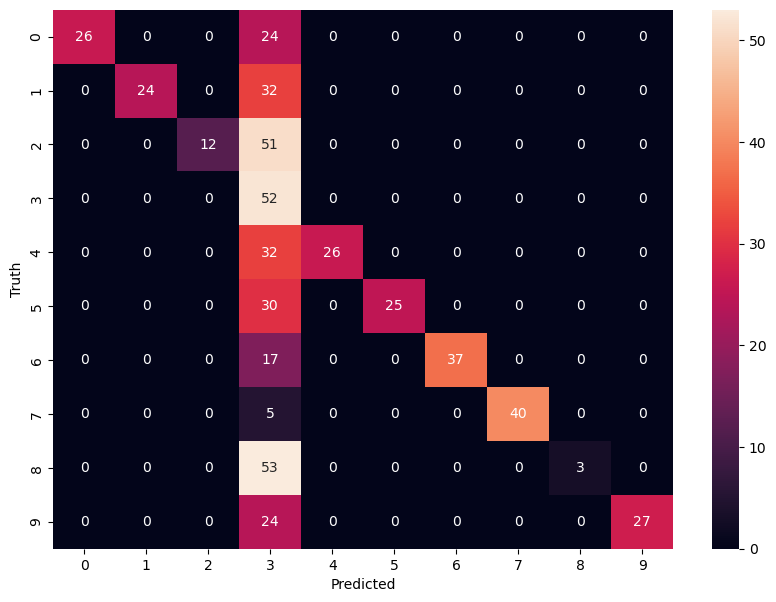

In [13]:
y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
model = SVC(kernel='linear', C=10, gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.975925925925926

Text(95.72222222222221, 0.5, 'Truth')

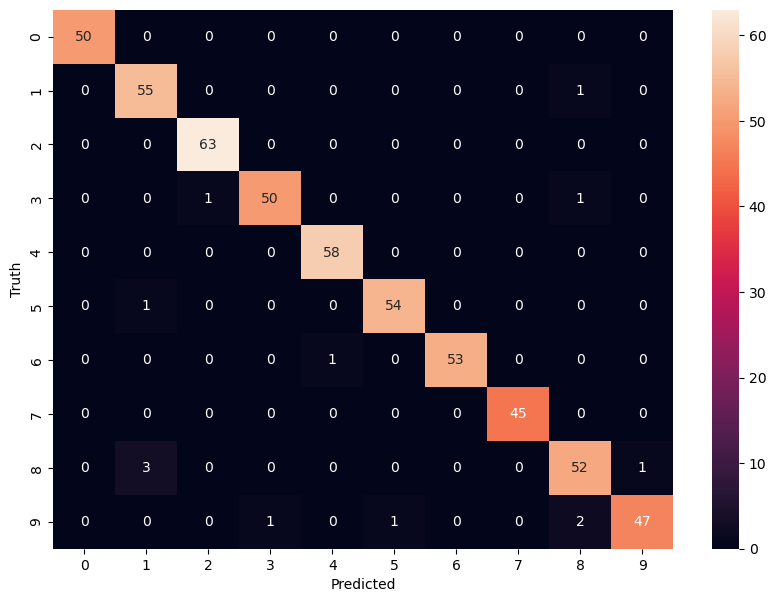

In [15]:
y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')